In [133]:
# conda activate py27_NLP
import sys
sys.path.append('/home/ydc19/Documents/NLP/medtopics')

from utils import corpus

# First run the mongoDB service on a terminal
# sudo mongod
from pymongo import MongoClient
client = MongoClient()

db_exams = client.kcl_test
collection = db_exams.kcl
collection.estimated_document_count()

INFO:CoreNLP_PyWrapper:Starting java subprocess, and waiting for signal it's ready, with command: exec java -Xmx4g -XX:ParallelGCThreads=1 -cp '/home/ydc19/anaconda2/envs/py27_NLP/lib/python2.7/site-packages/stanford_corenlp_pywrapper/lib/*:/home/ydc19/Documents/NLP/stanford-corenlp-full-2015-12-09/*:/home/ydc19/Documents/NLP/stanford-corenlp-full-2015-12-09/stanford-english-corenlp-2016-01-10-models.jar'      corenlp.SocketServer --outpipe /tmp/corenlp_pywrap_pipe_pypid=8073_time=1565789921.46  --configdict '{"output_types": ["pos", "parse"], "parse.model": "edu/stanford/nlp/models/parser/nndep/english_UD.gz", "annotators": "tokenize, ssplit, pos, depparse"}'
INFO:CoreNLP_PyWrapper:Successful ping. The server has started.
INFO:CoreNLP_PyWrapper:Subprocess is ready.


818680

In [30]:
# Get labels in DB
dLabelsInDB = dict()
res = collection.distinct("Annotations.Report.labels")
for i in res:
    dLabelsInDB[i] = 0
print dLabelsInDB

{u'right_upper_lobe_collapse': 0, u'mediastinum_displaced': 0, u'pleural_effusion': 0, u'subcutaneous_emphysema': 0, u'dextrocardia': 0, u'unfolded_aorta': 0, u'right_lower_lobe_collapse': 0, u'parenchymal_lesion': 0, u'interstitial_shadowing': 0, u'rib_lesion': 0, u'aortic_calcification': 0, u'mediastinum_widened': 0, u'hyperexpanded_lungs': 0, u'right_middle_lobe_collapse': 0, u'emphysema': 0, u'pneumomediastinum': 0, u'atelectasis': 0, u'hemidiaphragm_elevated': 0, u'rib_fracture': 0, u'left_lower_lobe_collapse': 0, u'bronchial_wall_thickening': 0, u'pneumothorax': 0, u'normal': 0, u'pneumoperitoneum': 0, u'cardiomegaly': 0, u'object': 0, u'consolidation': 0, u'clavicle_fracture': 0, u'hernia': 0, u'bulla': 0, u'left_upper_lobe_collapse': 0, u'dilated_bowel': 0, u'ground_glass_opacification': 0, u'paratracheal_hilar_enlargement': 0, u'scoliosis': 0, u'cavitating_lung_lesion': 0, u'pleural_abnormality': 0}


In [31]:
# Count pressence of each label
for l in dLabelsInDB:
    res = collection.find({"Annotations.Report.labels": {"$exists": "true", "$in": [l]},"Age":{"$gt": 5840}})
    dLabelsInDB[l] = res.count()

print dLabelsInDB

/home/ydc19/anaconda2/envs/py27_NLP/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  after removing the cwd from sys.path.


{u'right_upper_lobe_collapse': 2276, u'mediastinum_displaced': 1559, u'pleural_effusion': 84973, u'subcutaneous_emphysema': 7815, u'dextrocardia': 128, u'unfolded_aorta': 9197, u'right_lower_lobe_collapse': 600, u'parenchymal_lesion': 23142, u'interstitial_shadowing': 13235, u'rib_lesion': 692, u'aortic_calcification': 614, u'mediastinum_widened': 572, u'hyperexpanded_lungs': 5586, u'right_middle_lobe_collapse': 286, u'emphysema': 5229, u'pneumomediastinum': 388, u'atelectasis': 50903, u'hemidiaphragm_elevated': 5260, u'rib_fracture': 7172, u'left_lower_lobe_collapse': 2427, u'bronchial_wall_thickening': 2876, u'pneumothorax': 25314, u'normal': 109646, u'pneumoperitoneum': 981, u'cardiomegaly': 52123, u'object': 137111, u'consolidation': 78869, u'clavicle_fracture': 761, u'hernia': 3813, u'bulla': 733, u'left_upper_lobe_collapse': 919, u'dilated_bowel': 331, u'ground_glass_opacification': 1150, u'paratracheal_hilar_enlargement': 8873, u'scoliosis': 4823, u'cavitating_lung_lesion': 1693

In [32]:
# # Count presence of ALL classes
# dLabelsInDB = dict()
# res = collection.find({"Annotations.Report.labels": {"$exists": "true"},"Age":{"$gt": 5840}},{"_id": 1})
# # res = collection.find({"Annotations.Report.labels": {"$exists": "true"}},{"_id": 1})
# for i in res:
#     ls = collection.find({"_id":i["_id"]},{"Annotations.Report.labels"})    
#     for l in ls[0]["Annotations"]["Report"]["labels"]:
#         if l in dLabelsInDB:
#             dLabelsInDB[l]+=1
#         else:
#             dLabelsInDB[l] = 1
# print dLabelsInDB

In [33]:
# # Load valid classes from csv
# import csv
# reader = csv.reader(open('/home/ydc19/Documents/Code/classesNLP.csv', 'r'))
# dLabels = dict()
# for line in reader:
#     dLabels[line[0]] = 0
# print dLabels

In [34]:
# # Count presence of valid classes
# res = collection.find({"Annotations.Report.labels": {"$exists": "true", "$ne":["normal"]},"Age":{"$gt": 5840}},{"_id": 1})
# for i in res:
#     ls = collection.find({"_id":i["_id"]},{"Annotations.Report.labels"})
#     #print ls[0]["Annotations"]["Report"]["labels"]
#     for l in ls[0]["Annotations"]["Report"]["labels"]:
#         if l in dLabels:
#             dLabels[l]+=1
# print dLabels

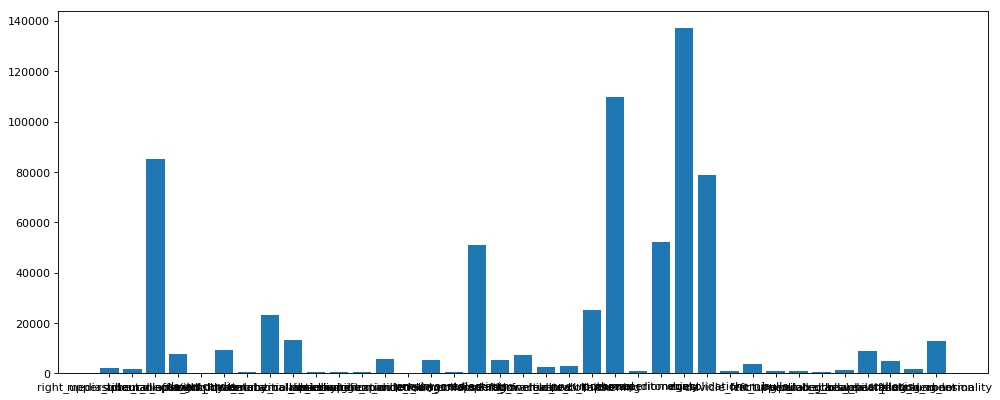

In [35]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(range(len(dLabelsInDB)), dLabelsInDB.values(), align='center')
plt.xticks(range(len(dLabelsInDB)), dLabelsInDB.keys())
plt.show()

In [36]:
# # arrayLs contains the totals of each label
# # selArrayLs contains the number already selected
# import operator

# numRepsPerLabel = 100
# selArrayLs = arrayLs.fromkeys(arrayLs, 0) # Copy of arrayLs with 0
# selIds = []
# arrayLsSorted = sorted(arrayLs, key=arrayLs.get)
# # arrayLsSorted = sorted(arrayLs.items(), key=operator.itemgetter(1))

# for label in arrayLsSorted:
#     print label
#     if selArrayLs[l] >= numRepsPerLabel:
#         continue
        
#     res_l = collection.find({"Annotations.Report.labels": {"$exists": "true", "$all": [label]},"Age":{"$gt": 5840}},{"_id": 1})
#     for report in res_l:
#         if selArrayLs[label] >= numRepsPerLabel:
#             break
#         ls = collection.find({"_id":report["_id"]},{"Annotations.Report.labels"})
#         skipThis = 0
#         for subl in ls[0]["Annotations"]["Report"]["labels"]:
#             if selArrayLs[subl] >= numRepsPerLabel:
#                 skipThis = 1
#                 break
#         if skipThis:
#             continue
#         selIds.append(report["_id"])
#         for subl in ls[0]["Annotations"]["Report"]["labels"]:
#             selArrayLs[subl] += 1
            

In [37]:
collection.find_one()

{u'Age': 40,
 u'Alarms': u'',
 u'Annotations': {u'Report': {u'Parsed': {u'Sentences': [{u'char_offsets': [[0,
        2],
       [3, 7],
       [8, 13],
       [14, 18],
       [19, 22],
       [23, 26],
       [27, 36],
       [37, 42],
       [43, 46],
       [47, 52],
       [53, 55],
       [56, 59],
       [60, 69],
       [69, 70]],
      u'deps_basic': [[u'root', -1, 2],
       [u'compound', 1, 0],
       [u'nsubj', 2, 1],
       [u'nmod', 2, 5],
       [u'punct', 2, 13],
       [u'case', 5, 3],
       [u'det', 5, 4],
       [u'acl', 5, 6],
       [u'nmod', 6, 9],
       [u'case', 9, 7],
       [u'det', 9, 8],
       [u'nmod', 9, 12],
       [u'case', 12, 10],
       [u'det', 12, 11]],
      u'deps_cc': [[u'root', -1, 2],
       [u'compound', 1, 0],
       [u'nsubj', 2, 1],
       [u'nmod:with', 2, 5],
       [u'punct', 2, 13],
       [u'case', 5, 3],
       [u'det', 5, 4],
       [u'acl', 5, 6],
       [u'nmod:below', 6, 9],
       [u'case', 9, 7],
       [u'det', 9, 8],
      

# First 10,000 reports:
## Uniformly distributed on the 37 labels

In [40]:
# dLabelsInDB contains the totals of each label
# dLabelsSelected contains the number already selected
import operator

numTotalRepsLim = 10000 # ~270 per label (some labels have less than this)
# numRepsPerLabel = 100
dLabelsSelected = dLabelsInDB.fromkeys(dLabelsInDB, 0) # Copy of dLabelsInDB with 0
selIds = []
# arrayLsSorted = sorted(arrayLs, key=arrayLs.get)
# arrayLsSorted = sorted(arrayLs.items(), key=operator.itemgetter(1))

numTotalReps = 0
while numTotalReps < numTotalRepsLim: # Select this number of reports
    aLabelsPendent = []
    for k,v in dLabelsSelected.items():
            if v < dLabelsInDB[k]:
                aLabelsPendent.append(k)

    labelMinReps = min(dLabelsSelected.viewkeys() & aLabelsPendent, key=dLabelsSelected.get)
#     labelMinReps = min(dLabelsSelected, key=dLabelsSelected.get)
    aLabelsTooManyReps = []
    for k,v in dLabelsSelected.items():
        if v >= dLabelsSelected[labelMinReps] + 25: # + 10% approx
            aLabelsTooManyReps.append(k)
    print "labelMinReps = {}".format(labelMinReps)
    print "aLabelsTooManyReps = {}".format(aLabelsTooManyReps)
        
    report = collection.find_one({"Annotations.Report.labels": {"$exists": "true", "$in": [labelMinReps], "$nin": aLabelsTooManyReps},"Age":{"$gt": 5840}, "_id": {"$nin":selIds}},{"_id": 1})
    if not report:
        print "=================================="
        print "Not considering aLabelsTooManyReps"
        print "=================================="
        report = collection.find_one({"Annotations.Report.labels": {"$exists": "true", "$in": [labelMinReps]},"Age":{"$gt": 5840}, "_id": {"$nin":selIds}},{"_id": 1})        
    ls = collection.find({"_id":report["_id"]},{"Annotations.Report.labels"})
    # Sum counters of all labels added
    for subl in ls[0]["Annotations"]["Report"]["labels"]:
        dLabelsSelected[subl] += 1
    selIds.append(report["_id"])
    numTotalReps += 1
    print "numTotalReps = {}".format(numTotalReps)

labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = []
numTotalReps = 1
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = []
numTotalReps = 2
labelMinReps = pleural_effusion
aLabelsTooManyReps = []
numTotalReps = 3
labelMinReps = subcutaneous_emphysema
aLabelsTooManyReps = []
numTotalReps = 4
labelMinReps = dextrocardia
aLabelsTooManyReps = []
numTotalReps = 5
labelMinReps = unfolded_aorta
aLabelsTooManyReps = []
numTotalReps = 6
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = []
numTotalReps = 7
labelMinReps = interstitial_shadowing
aLabelsTooManyReps = []
numTotalReps = 8
labelMinReps = rib_lesion
aLabelsTooManyReps = []
numTotalReps = 9
labelMinReps = mediastinum_widened
aLabelsTooManyReps = []
numTotalReps = 10
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = []
numTotalReps = 11
labelMinReps = normal
aLabelsTooManyReps = []
numTotalReps = 12
labelMinReps = emphysema
aLabelsTooManyReps = []
numTotalReps = 13
labelMinReps = pneumomediastinum
aL

numTotalReps = 108
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'object', u'consolidation']
numTotalReps = 109
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'object', u'consolidation']
numTotalReps = 110
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'object', u'consolidation']
numTotalReps = 111
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = [u'object', u'consolidation']
numTotalReps = 112
labelMinReps = normal
aLabelsTooManyReps = [u'object', u'consolidation']
numTotalReps = 113
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'object', u'consolidation']
numTotalReps = 114
labelMinReps = hemidiaphragm_elevated
aLabelsTooManyReps = [u'object', u'consolidation']
numTotalReps = 115
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'object', u'consolidation']
numTotalReps = 116
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'object', u'consolidation']
numTotalReps = 117
labelMinReps = right_middle_lobe_colla

numTotalReps = 191
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'object', u'consolidation']
numTotalReps = 192
labelMinReps = hernia
aLabelsTooManyReps = [u'object', u'consolidation']
numTotalReps = 193
labelMinReps = bulla
aLabelsTooManyReps = [u'object', u'consolidation']
numTotalReps = 194
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'object', u'consolidation']
numTotalReps = 195
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'object', u'consolidation']
numTotalReps = 196
labelMinReps = scoliosis
aLabelsTooManyReps = [u'object', u'consolidation']
numTotalReps = 197
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'object', u'consolidation']
numTotalReps = 198
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'object', u'consolidation']
numTotalReps = 199
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = []
numTotalReps = 200
labelMinReps = subcutaneous_emphysema
aLabelsTooManyReps = [u'object']
numTotalReps = 201
lab

numTotalReps = 259
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 260
labelMinReps = bulla
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 261
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 262
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 263
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 264
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 265
labe

numTotalReps = 319
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 320
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 321
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 322
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 323
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 324
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atel

numTotalReps = 376
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = []
numTotalReps = 377
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = []
numTotalReps = 378
labelMinReps = dextrocardia
aLabelsTooManyReps = [u'atelectasis']
numTotalReps = 379
labelMinReps = unfolded_aorta
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps = 380
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps = 381
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 382
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 383
labelMinReps = normal
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_l

numTotalReps = 429
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion']
numTotalReps = 430
labelMinReps = normal
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion']
numTotalReps = 431
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion']
numTotalReps = 432
labelMinReps = hemidiaphragm_elevated
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion']
numTotalReps = 433
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion']
numTotalReps = 434
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'at

numTotalReps = 481
labelMinReps = bulla
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 482
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 483
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 484
labelMinReps = scoliosis
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 485
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 486
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 487
labelMinReps

numTotalReps = 534
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pleural_effusion', u'object']
numTotalReps = 535
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion']
numTotalReps = 536
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion']
numTotalReps = 537
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion']
numTotalReps = 538
labelMinReps = normal
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion']
numTotalReps = 539
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion']
numTotalReps = 540
labelMinReps = hemidiaphragm_elevated
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion']
numTotalReps 

numTotalReps = 588
labelMinReps = hemidiaphragm_elevated
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 589
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 590
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 591
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 592
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 593
labelMinReps = hernia
aLabelsTooManyReps = [u'pleural_effusio

labelMinReps = bulla
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 640
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 641
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 642
labelMinReps = scoliosis
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 643
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 644
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'con

numTotalReps = 692
labelMinReps = unfolded_aorta
aLabelsTooManyReps = [u'object', u'consolidation', u'atelectasis']
numTotalReps = 693
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'object', u'consolidation', u'atelectasis']
numTotalReps = 694
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps = 695
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps = 696
labelMinReps = normal
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 697
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 698
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectas

numTotalReps = 745
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 746
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 747
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 748
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 749
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 750
labelMinReps = hernia
aLabelsTooManyReps = [u'pleural_eff

labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 796
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 797
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 798
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 799
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 800
labelMinReps = d

numTotalReps = 847
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion']
numTotalReps = 848
labelMinReps = normal
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion']
numTotalReps = 849
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion']
numTotalReps = 850
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion']
numTotalReps = 851
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 852
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 853
labelMinReps = pneumoperitoneum
aLabelsTooManyReps

numTotalReps = 897
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 898
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 899
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 900
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 901
labelMinReps = rib_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 902
labelMinRe

numTotalReps = 945
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 946
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 947
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 948
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 949
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = []
numTotalReps = 950
labelMinReps = dextrocardia
aLabelsTooManyReps = []
numTotalReps = 951
labelMinReps = unfolded_aor

numTotalReps = 992
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = []
numTotalReps = 993
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = []
numTotalReps = 994
labelMinReps = dextrocardia
aLabelsTooManyReps = [u'pneumothorax', u'object', u'consolidation']
numTotalReps = 995
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'object', u'consolidation']
numTotalReps = 996
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation']
numTotalReps = 997
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation']
numTotalReps = 998
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion']
numTotalReps = 999
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'co

numTotalReps = 1041
labelMinReps = unfolded_aorta
aLabelsTooManyReps = [u'pneumothorax', u'object', u'parenchymal_lesion']
numTotalReps = 1042
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'object', u'parenchymal_lesion']
numTotalReps = 1043
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion']
numTotalReps = 1044
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion']
numTotalReps = 1045
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion']
numTotalReps = 1046
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion']
numTotalReps = 1047
labelMinReps = pneumomediastinum
aLabelsToo

numTotalReps = 1090
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1091
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1092
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1093
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1094
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_les

numTotalReps = 1137
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1138
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1139
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1140
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1141
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1142
labelMinRe

numTotalReps = 1185
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = []
numTotalReps = 1186
labelMinReps = dextrocardia
aLabelsTooManyReps = [u'object']
numTotalReps = 1187
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'object', u'consolidation']
numTotalReps = 1188
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation']
numTotalReps = 1189
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation']
numTotalReps = 1190
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation']
numTotalReps = 1191
labelMinReps = normal
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion']
numTotalReps = 1192
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion

numTotalReps = 1234
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps = 1235
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps = 1236
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps = 1237
labelMinReps = normal
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1238
labelMinReps = emphysema
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1239
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1240
labelMinReps = hemidiaphragm_elevated
aLabelsTooManyReps = [u'pneumoth

numTotalReps = 1284
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1285
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1286
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1287
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1288
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
num

numTotalReps = 1332
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1333
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1334
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1335
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1336
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1337


numTotalReps = 1379
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1380
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1381
labelMinReps = rib_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1382
labelMinReps = paratracheal_hilar_enlargement
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1383
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelecta

numTotalReps = 1427
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1428
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1429
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1430
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1431
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = []
numTotalReps = 1432
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'atelectasis']
numTotalReps = 14

numTotalReps = 1476
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object']
numTotalReps = 1477
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation']
numTotalReps = 1478
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation']
numTotalReps = 1479
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation']
numTotalReps = 1480
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation']
numTotalReps = 1481
labelMinReps = hemidiaphragm_elevated
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion']
numTotalReps = 1482
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumotho

numTotalReps = 1521
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = []
numTotalReps = 1522
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'object', u'atelectasis']
numTotalReps = 1523
labelMinReps = subcutaneous_emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'atelectasis']
numTotalReps = 1524
labelMinReps = dextrocardia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'atelectasis']
numTotalReps = 1525
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'atelectasis']
numTotalReps = 1526
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'atelectasis']
numTotalReps = 1527
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1528
labelMinReps = hyperexpanded_lungs
aLabelsToo

numTotalReps = 1570
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation']
numTotalReps = 1571
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation']
numTotalReps = 1572
labelMinReps = normal
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation']
numTotalReps = 1573
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation']
numTotalReps = 1574
labelMinReps = hemidiaphragm_elevated
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'atelectasis']
numTotalReps = 1575
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1576
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothora

numTotalReps = 1619
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1620
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 1621
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1622
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1623
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchy

numTotalReps = 1662
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1663
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1664
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1665
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1666
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1667


numTotalReps = 1707
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1708
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1709
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1710
labelMinReps = scoliosis
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1711
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1712
la

numTotalReps = 1750
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1751
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1752
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1753
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'consolidation']
numTotalReps = 1754
labelMinReps = subcutaneous_emphysema
aLabelsTooManyReps = [u'pneumothorax', u'object', u'consolidation']
numTotalReps = 1755
labelMinReps = dextrocardia
aLabelsTooManyReps = [u'pneumothorax', u'object', u'consolidation']
numTotalReps = 1756
labelMinReps = right_lower_lobe_collapse
aL

numTotalReps = 1794
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 1795
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 1796
labelMinReps = scoliosis
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 1797
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 1798
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'ple

numTotalReps = 1835
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 1836
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 1837
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 1838
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 1839
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'ca

numTotalReps = 1877
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 1878
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 1879
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 1880
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 1881
labelMinReps = bulla
aLabelsTooManyReps = [u'pne

numTotalReps = 1919
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1920
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1921
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1922
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1923
labelMinReps = rib_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 1924
labelMinReps = paratra

numTotalReps = 1964
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 1965
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 1966
labelMinReps = rib_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 1967
labelMinReps = scoliosis
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 1968
labelMinReps = cavitating_lung_lesion
aLabelsTooManyRep

numTotalReps = 2007
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2008
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 2009
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2010
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2011
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothor

numTotalReps = 2046
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2047
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2048
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2049
labelMinReps = emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2050
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2051
labelMinReps = hemidiaphragm_elevated
a

numTotalReps = 2087
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2088
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'cardiomegaly', u'object', u'atelectasis']
numTotalReps = 2089
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2090
labelMinReps = subcutaneous_emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2091
labelMinReps = dextrocardia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2092
labelMinReps = unfolded_aorta
aLabelsTooManyReps = [u'pneumothor

numTotalReps = 2128
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 2129
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2130
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2131
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps = 2132
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps

numTotalReps = 2168
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2169
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2170
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2171
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2172
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardi

numTotalReps = 2208
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2209
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2210
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 2211
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2212
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consoli

numTotalReps = 2246
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'atelectasis']
numTotalReps = 2247
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'atelectasis']
numTotalReps = 2248
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'atelectasis']
numTotalReps = 2249
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2250
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 2251
labelMinReps = hemidiaphragm_elevated


numTotalReps = 2285
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2286
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps = 2287
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps = 2288
labelMinReps = subcutaneous_emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps = 2289
labelMinReps = dextrocardia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 2290
labelMinReps = unfolded_aorta
aLabelsTooManyReps = [u'pneumothorax', u'pl

numTotalReps = 2324
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2325
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2326
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2327
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 2328
labelMinReps = rib_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u

numTotalReps = 2363
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2364
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2365
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 2366
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2367
labelMinReps = hernia

Not considering aLabelsTooManyReps
numTotalReps = 2400
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2401
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2402
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2403
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2404
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps

numTotalReps = 2438
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2439
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2440
labelMinReps = subcutaneous_emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2441
labelMinReps = dextrocardia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 2442
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'obj

Not considering aLabelsTooManyReps
numTotalReps = 2474
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2475
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2476
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2477
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2478
labelMinReps = dilated_bowel
aLabelsTooManyReps = [

numTotalReps = 2510
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2511
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2512
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 2513
labelMinReps = hemidiaphragm_elevated
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2514
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly'

numTotalReps = 2547
labelMinReps = dextrocardia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 2548
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2549
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2550
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2551
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2552
labelMinR

numTotalReps = 2583
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2584
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'atelectasis']
numTotalReps = 2585
labelMinReps = subcutaneous_emphysema
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'atelectasis']
numTotalReps = 2586
labelMinReps = dextrocardia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 2587
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'atelectasis']
numTotalReps = 2588
labelMinReps = rib_lesion
aLabelsTo

numTotalReps = 2619
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2620
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2621
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2622
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 2623
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pne

numTotalReps = 2656
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2657
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2658
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 2659
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2660
labelMinReps = clavicl

numTotalReps = 2692
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation']
numTotalReps = 2693
labelMinReps = dextrocardia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 2694
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps = 2695
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps = 2696
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2697
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion',

numTotalReps = 2730
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 2731
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2732
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2733
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation']
numTotalReps = 2734
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'

numTotalReps = 2767
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2768
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2769
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2770
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2771
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardi

Not considering aLabelsTooManyReps
numTotalReps = 2804
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2805
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2806
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2807
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2808
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation

numTotalReps = 2841
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 2842
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2843
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2844
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2845
labelMinReps = bulla
aLabelsTooManyReps = [u'pne

numTotalReps = 2878
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2879
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 2880
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2881
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2882
labelMinReps = hernia
aLabels

numTotalReps = 2915
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps = 2916
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2917
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2918
labelMinReps = emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2919
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 2920
labelMinReps = hemi

numTotalReps = 2952
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2953
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2954
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2955
labelMinReps = subcutaneous_emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2956
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 2957
labelMinReps = rib_lesion
aLabelsTooM

numTotalReps = 2990
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2991
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2992
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 2993
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 2994
labelMinReps = rib_fracture
aLabelsTooManyReps = [u'pneumothorax'

Not considering aLabelsTooManyReps
numTotalReps = 3030
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3031
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3032
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3033
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 3034
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pn

numTotalReps = 3067
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps = 3068
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3069
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3070
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 3071
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps 

numTotalReps = 3107
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3108
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3109
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 3110
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3111
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'par

numTotalReps = 3146
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3147
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 3148
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3149
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3150
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', 

numTotalReps = 3186
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3187
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3188
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 3189
labelMinReps = hemidiaphragm_elevated
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3190
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'a

numTotalReps = 3226
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3227
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3228
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 3229
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3230
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'paren

numTotalReps = 3262
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps = 3263
labelMinReps = unfolded_aorta
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps = 3264
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'atelectasis']
numTotalReps = 3265
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3266
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3267
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'o

numTotalReps = 3302
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 3303
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps = 3304
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps = 3305
labelMinReps = subcutaneous_emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps = 3306
labelMinReps = unfolded_aorta
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps = 3307
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'car

numTotalReps = 3342
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 3343
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 3344
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 3345
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps = 3346
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'o

numTotalReps = 3381
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3382
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3383
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3384
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3385
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooMany

numTotalReps = 3419
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 3420
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 3421
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 3422
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 3423
labelMinReps = left_upper_lobe_collapse
a

numTotalReps = 3454
labelMinReps = hemidiaphragm_elevated
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3455
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 3456
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 3457
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 3458
labelMinReps = pneumoperitoneum
aLabelsTooM

numTotalReps = 3492
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 3493
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 3494
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 3495
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 3496
labelMinReps = left_upper_lobe_collapse
aLabelsTo

numTotalReps = 3528
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3529
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3530
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 3531
labelMinReps = hemidiaphragm_elevated
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3532
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parench

numTotalReps = 3564
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps = 3565
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps = 3566
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps = 3567
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3568
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3569
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u

numTotalReps = 3600
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 3601
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 3602
labelMinReps = rib_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 3603
labelMinReps = paratracheal_hilar_enlargement
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 3604

Not considering aLabelsTooManyReps
numTotalReps = 3637
labelMinReps = hemidiaphragm_elevated
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3638
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3639
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 3640
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 3641
labelMinReps = pneumoperitoneum
aL

numTotalReps = 3671
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation']
numTotalReps = 3672
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation']
numTotalReps = 3673
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps = 3674
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps = 3675
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 3676
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'

numTotalReps = 3708
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 3709
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3710
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3711
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3712
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 371

numTotalReps = 3746
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 3747
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 3748
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 3749
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 3750

Not considering aLabelsTooManyReps
numTotalReps = 3780
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 3781
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 3782
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 3783
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 3784
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneum

numTotalReps = 3814
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 3815
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 3816
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 3817
labelMinReps = hemidiaphragm_elevated
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 3818
labelMinReps = ground_glass_opacification
aLabels

numTotalReps = 3848
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 3849
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 3850
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 3851
labelMinReps = subcutaneous_emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps = 3852
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'

numTotalReps = 3883
labelMinReps = pleural_abnormality
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 3884
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 3885
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 3886
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 3887
labelMinReps = clavicle_fra

Not considering aLabelsTooManyReps
numTotalReps = 3919
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3920
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3921
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 3922
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3923
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u

numTotalReps = 3953
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps = 3954
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 3955
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps = 3956
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3957
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 3958
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u

Not considering aLabelsTooManyReps
numTotalReps = 3990
labelMinReps = rib_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 3991
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 3992
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 3993
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps = 3994
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'ob

numTotalReps = 4026
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4027
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4028
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 4029
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 4030
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', 

numTotalReps = 4064
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 4065
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 4066
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 4067
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 4068
labelMinReps = bulla
aLabelsTooManyReps = [u'pne

numTotalReps = 4098
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'atelectasis']
numTotalReps = 4099
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4100
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4101
labelMinReps = emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4102
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 4103
la

numTotalReps = 4134
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 4135
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'atelectasis']
numTotalReps = 4136
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'atelectasis']
numTotalReps = 4137
labelMinReps = subcutaneous_emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'atelectasis']
numTotalReps = 4138
labelMinReps = unfolded_aorta
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'atelectasis']
numTotalReps = 4139
labelMinReps = right_lower_lobe_colla

numTotalReps = 4172
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 4173
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 4174
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 4175
labelMinReps = paratracheal_hilar_enlargement
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 4176
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = 

numTotalReps = 4208
labelMinReps = hemidiaphragm_elevated
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4209
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4210
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4211
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 4212
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u

Not considering aLabelsTooManyReps
numTotalReps = 4244
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4245
labelMinReps = subcutaneous_emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4246
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 4247
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4248
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegal

numTotalReps = 4277
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 4278
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 4279
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 4280
labelMinReps = rib_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 4281
labelMinReps = cavitatin

Not considering aLabelsTooManyReps
numTotalReps = 4319
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 4320
labelMinReps = rib_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 4321
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 4322
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyR

numTotalReps = 4359
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 4360
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 4361
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 4362
labelMinReps = rib_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 4363
labelMinReps = cavitatin

numTotalReps = 4398
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4399
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4400
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4401
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4402
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooM

Not considering aLabelsTooManyReps
numTotalReps = 4439
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 4440
labelMinReps = rib_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 4441
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 4442
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyR

Not considering aLabelsTooManyReps
numTotalReps = 4480
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 4481
labelMinReps = scoliosis
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 4482
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 4483
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps

numTotalReps = 4520
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 4521
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 4522
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps = 4523
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 4524
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'co

numTotalReps = 4562
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4563
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 4564
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4565
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4566
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation',

numTotalReps = 4602
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 4603
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 4604
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 4605
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 4606
labelMinReps

numTotalReps = 4642
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4643
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4644
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 4645
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 4646
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'

Not considering aLabelsTooManyReps
numTotalReps = 4683
labelMinReps = hemidiaphragm_elevated
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 4684
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 4685
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 4686
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 4687
labelMinReps = r

numTotalReps = 4722
labelMinReps = subcutaneous_emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4723
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 4724
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4725
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 4726
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly'

numTotalReps = 4761
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 4762
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'atelectasis']
numTotalReps = 4763
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4764
labelMinReps = subcutaneous_emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4765
labelMinReps = unfolded_aorta
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4766
la

numTotalReps = 4802
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 4803
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4804
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4805
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 4806
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'p

numTotalReps = 4840
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4841
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 4842
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 4843
labelMinReps = rib_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4844
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'cons

numTotalReps = 4880
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 4881
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 4882
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 4883
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 4884
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneum

Not considering aLabelsTooManyReps
numTotalReps = 4919
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 4920
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 4921
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 4922
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 4923
labelMinReps = dilated_bow

numTotalReps = 4960
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4961
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4962
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4963
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 4964
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u

labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4998
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 4999
labelMinReps = subcutaneous_emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 5000
labelMinReps = unfolded_aorta
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 5001
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not cons

numTotalReps = 5036
labelMinReps = paratracheal_hilar_enlargement
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5037
labelMinReps = scoliosis
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5038
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5039
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 5040
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_eff

numTotalReps = 5073
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 5074
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 5075
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5076
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5077
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation',

numTotalReps = 5110
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5111
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5112
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5113
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5114
labelMinReps 

Not considering aLabelsTooManyReps
numTotalReps = 5148
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5149
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5150
labelMinReps = emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5151
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5152
labelMinReps = ground_glass

numTotalReps = 5184
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5185
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5186
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5187
labelMinReps = subcutaneous_emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5188
labelMinReps = right_lowe

numTotalReps = 5222
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5223
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5224
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5225
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 

numTotalReps = 5258
labelMinReps = emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5259
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5260
labelMinReps = hemidiaphragm_elevated
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5261
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5262
labelMinReps = left_lower_lobe_collapse

Not considering aLabelsTooManyReps
numTotalReps = 5292
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5293
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5294
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5295
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', 

Not considering aLabelsTooManyReps
numTotalReps = 5325
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5326
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5327
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5328
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalRep

numTotalReps = 5359
labelMinReps = unfolded_aorta
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 5360
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5361
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5362
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5363
labelMinReps = hyperexpanded_lungs
aL

Not considering aLabelsTooManyReps
numTotalReps = 5396
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5397
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5398
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5399
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'a

numTotalReps = 5432
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5433
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5434
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5435
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps =

numTotalReps = 5464
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 5465
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5466
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 5467
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 5468
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'ate

Not considering aLabelsTooManyReps
numTotalReps = 5498
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5499
labelMinReps = rib_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5500
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5501
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelect

numTotalReps = 5530
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 5531
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5532
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5533
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5534
labelMinReps = pneumoperitoneum
aLabels

numTotalReps = 5561
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5562
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5563
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5564
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5565
lab

numTotalReps = 5594
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5595
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5596
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5597
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5598
labelMinReps = dilated_bow

Not considering aLabelsTooManyReps
numTotalReps = 5629
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5630
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5631
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5632
labelMinReps = hemidiaphragm_elevated
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5633
labelMinReps =

Not considering aLabelsTooManyReps
numTotalReps = 5664
labelMinReps = paratracheal_hilar_enlargement
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5665
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5666
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5667
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 5668
labelMin

numTotalReps = 5698
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 5699
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5700
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5701
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5702
labelMinReps = hernia

numTotalReps = 5730
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 5731
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5732
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 5733
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5734
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u

Not considering aLabelsTooManyReps
numTotalReps = 5765
labelMinReps = paratracheal_hilar_enlargement
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5766
labelMinReps = scoliosis
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5767
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5768
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 57

numTotalReps = 5800
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5801
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5802
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5803
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTot

numTotalReps = 5832
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5833
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 5834
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 5835
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5836
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'p

Not considering aLabelsTooManyReps
numTotalReps = 5866
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5867
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5868
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5869
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalRep

Not considering aLabelsTooManyReps
numTotalReps = 5899
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5900
labelMinReps = right_middle_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5901
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5902
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowin

numTotalReps = 5932
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5933
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5934
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5935
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5936
label

Not considering aLabelsTooManyReps
numTotalReps = 5965
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5966
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5967
labelMinReps = paratracheal_hilar_enlargement
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5968
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_sh

Not considering aLabelsTooManyReps
numTotalReps = 5997
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 5998
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 5999
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6000
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6001

numTotalReps = 6030
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 6031
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 6032
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6033
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6034
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object',

numTotalReps = 6070
labelMinReps = hemidiaphragm_elevated
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6071
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6072
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6073
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6074
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax',

Not considering aLabelsTooManyReps
numTotalReps = 6112
labelMinReps = hemidiaphragm_elevated
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6113
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6114
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6115
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6116
labelMinReps = n

numTotalReps = 6151
labelMinReps = hemidiaphragm_elevated
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 6152
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 6153
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 6154
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6155
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchyma

numTotalReps = 6183
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6184
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6185
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6186
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6187
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumoth

numTotalReps = 6221
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6222
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 6223
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 6224
labelMinReps = subcutaneous_emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 6225
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'car

numTotalReps = 6260
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6261
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6262
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6263
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 6264
labelMinReps = subcutaneo

numTotalReps = 6298
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6299
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6300
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6301
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']

numTotalReps = 6336
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6337
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6338
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6339
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6340
labelMi

numTotalReps = 6373
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6374
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6375
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6376
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6377
labelMinReps = hernia
aLabelsTooManyReps = [u'pne

numTotalReps = 6410
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6411
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6412
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6413
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6414
labelMinReps = hernia
aLabelsTooManyReps = [u'pne

numTotalReps = 6448
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6449
labelMinReps = pleural_abnormality
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6450
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6451
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6452
labelMinReps = pneumoperitoneum
aLabels

numTotalReps = 6487
labelMinReps = hemidiaphragm_elevated
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6488
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6489
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6490
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6491
labelMinReps = n

numTotalReps = 6521
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6522
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6523
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6524
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6525
lab

numTotalReps = 6557
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6558
labelMinReps = rib_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6559
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6560
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyR

Not considering aLabelsTooManyReps
numTotalReps = 6593
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6594
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6595
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6596
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not 

Not considering aLabelsTooManyReps
numTotalReps = 6630
labelMinReps = pleural_abnormality
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 6631
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6632
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6633
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6634
labelMinReps = clavicle_fracture
aLabel

numTotalReps = 6667
labelMinReps = emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6668
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6669
labelMinReps = hemidiaphragm_elevated
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6670
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6671
labelMinReps = left_lower_lobe_collapse

Not considering aLabelsTooManyReps
numTotalReps = 6703
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6704
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6705
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6706
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooMany

Not considering aLabelsTooManyReps
numTotalReps = 6739
labelMinReps = rib_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6740
labelMinReps = paratracheal_hilar_enlargement
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6741
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6742
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considerin

Not considering aLabelsTooManyReps
numTotalReps = 6776
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6777
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6778
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6779
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalRep

numTotalReps = 6810
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6811
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6812
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6813
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTot

numTotalReps = 6844
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 6845
labelMinReps = subcutaneous_emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 6846
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6847
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 6848
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'

Not considering aLabelsTooManyReps
numTotalReps = 6881
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6882
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6883
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'atelectasis']
numTotalReps = 6884
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 68

Not considering aLabelsTooManyReps
numTotalReps = 6917
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6918
labelMinReps = dilated_bowel
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6919
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6920
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_l

Not considering aLabelsTooManyReps
numTotalReps = 6952
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6953
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6954
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6955
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalRep

Not considering aLabelsTooManyReps
numTotalReps = 6986
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 6987
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6988
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 6989
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 6990
labelMinReps = hernia
aLabelsTooManyReps 

Not considering aLabelsTooManyReps
numTotalReps = 7021
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 7022
labelMinReps = emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 7023
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7024
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7025
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', 

Not considering aLabelsTooManyReps
numTotalReps = 7055
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 7056
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 7057
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7058
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 7059
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiome

Not considering aLabelsTooManyReps
numTotalReps = 7088
labelMinReps = paratracheal_hilar_enlargement
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7089
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7090
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7091
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interst

numTotalReps = 7121
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7122
labelMinReps = paratracheal_hilar_enlargement
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7123
labelMinReps = scoliosis
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7124
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps 

numTotalReps = 7155
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7156
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7157
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7158
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7159
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleura

numTotalReps = 7189
labelMinReps = hemidiaphragm_elevated
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 7190
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7191
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7192
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7193
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneum

numTotalReps = 7224
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7225
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 7226
labelMinReps = emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 7227
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7228
labelMinReps = hemidiaphragm_elevated
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'objec

numTotalReps = 7259
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7260
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 7261
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 7262
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7263
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'p

Not considering aLabelsTooManyReps
numTotalReps = 7293
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7294
labelMinReps = paratracheal_hilar_enlargement
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7295
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7296
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'intersti

numTotalReps = 7327
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7328
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7329
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7330
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7331
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleura

numTotalReps = 7361
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7362
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7363
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7364
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7365
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleura

numTotalReps = 7394
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7395
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7396
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7397
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsToo

numTotalReps = 7426
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7427
labelMinReps = hemidiaphragm_elevated
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 7428
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 7429
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7430
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'co

numTotalReps = 7460
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 7461
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7462
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 7463
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7464
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly',

numTotalReps = 7492
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 7493
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 7494
labelMinReps = unfolded_aorta
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 7495
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7496
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'pa

Not considering aLabelsTooManyReps
numTotalReps = 7526
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7527
labelMinReps = rib_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7528
labelMinReps = paratracheal_hilar_enlargement
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7529
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not consider

Not considering aLabelsTooManyReps
numTotalReps = 7560
labelMinReps = hemidiaphragm_elevated
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 7561
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7562
labelMinReps = pleural_abnormality
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 7563
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7564
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleu

Not considering aLabelsTooManyReps
numTotalReps = 7593
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7594
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 7595
labelMinReps = subcutaneous_emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7596
labelMinReps = unfolded_aorta
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7597
labelMinReps = right_lower_l

numTotalReps = 7626
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7627
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7628
labelMinReps = paratracheal_hilar_enlargement
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7629
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering a

Not considering aLabelsTooManyReps
numTotalReps = 7659
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7660
labelMinReps = hemidiaphragm_elevated
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7661
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7662
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_sh

Not considering aLabelsTooManyReps
numTotalReps = 7690
labelMinReps = paratracheal_hilar_enlargement
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7691
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7692
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7693
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitia

Not considering aLabelsTooManyReps
numTotalReps = 7721
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7722
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7723
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7724
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7725
labelMinReps =

Not considering aLabelsTooManyReps
numTotalReps = 7753
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7754
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7755
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7756
labelMinReps = emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTot

numTotalReps = 7784
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7785
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7786
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7787
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelec

numTotalReps = 7815
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7816
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7817
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7818
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7819
labelMi

Not considering aLabelsTooManyReps
numTotalReps = 7848
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7849
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7850
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7851
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering a

numTotalReps = 7880
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7881
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7882
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7883
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7884
labelMinReps = left_upper_lobe_col

Not considering aLabelsTooManyReps
numTotalReps = 7912
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7913
labelMinReps = emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 7914
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7915
labelMinReps = hemidiaphragm_elevated
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 7916
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'p

numTotalReps = 7948
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 7949
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7950
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7951
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7952
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = [u'pneumothorax'

numTotalReps = 7979
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7980
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 7981
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7982
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 7983
labelMinReps = paratrachea

numTotalReps = 8011
labelMinReps = pneumomediastinum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8012
labelMinReps = hemidiaphragm_elevated
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8013
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8014
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8015
labelMi

numTotalReps = 8043
labelMinReps = subcutaneous_emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8044
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8045
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8046
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabel

numTotalReps = 8080
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8081
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8082
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 8083
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 8084
labelMinReps = subcutaneous_emphysema
aLabel

Not considering aLabelsTooManyReps
numTotalReps = 8117
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8118
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8119
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 8120
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 8121
labelMinR

Not considering aLabelsTooManyReps
numTotalReps = 8148
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8149
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 8150
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8151
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 8152
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'card

numTotalReps = 8180
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 8181
labelMinReps = subcutaneous_emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 8182
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8183
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8184
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegal

numTotalReps = 8211
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8212
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8213
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8214
labelMinReps = rib_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8215
labelMinReps = cavit

numTotalReps = 8246
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 8247
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8248
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8249
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8250
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effus

numTotalReps = 8277
labelMinReps = subcutaneous_emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8278
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8279
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8280
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabel

numTotalReps = 8313
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8314
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8315
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 8316
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8317
labelMinR

numTotalReps = 8348
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8349
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8350
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8351
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTot

numTotalReps = 8383
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8384
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8385
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8386
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8387
labelMinReps = hernia
aLabelsTooManyReps = [u'pne

numTotalReps = 8417
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8418
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 8419
labelMinReps = hemidiaphragm_elevated
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 8420
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8421
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', 

Not considering aLabelsTooManyReps
numTotalReps = 8453
labelMinReps = subcutaneous_emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8454
labelMinReps = unfolded_aorta
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8455
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8456
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooM

numTotalReps = 8483
labelMinReps = pleural_abnormality
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8484
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8485
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8486
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8487
labelMinReps = clavicle_fracture
aLabelsTooMany

numTotalReps = 8515
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8516
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8517
labelMinReps = subcutaneous_emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8518
labelMinReps = unfolded_aorta
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8519
labelMinReps = right_lower_lobe

Not considering aLabelsTooManyReps
numTotalReps = 8550
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8551
labelMinReps = rib_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8552
labelMinReps = paratracheal_hilar_enlargement
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8553
labelMinReps = scoliosis
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8554
lab

numTotalReps = 8579
labelMinReps = subcutaneous_emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8580
labelMinReps = unfolded_aorta
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8581
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8582
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8583
labelMi

numTotalReps = 8609
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8610
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8611
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8612
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8613
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleura

Not considering aLabelsTooManyReps
numTotalReps = 8644
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8645
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8646
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8647
labelMinReps = emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTot

numTotalReps = 8673
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8674
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8675
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8676
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8677
labelMinReps = left_upper_lobe_col

numTotalReps = 8703
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8704
labelMinReps = subcutaneous_emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8705
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8706
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLab

numTotalReps = 8737
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8738
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8739
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8740
labelMinReps = paratracheal_hilar_enlargement
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8741
labelMinReps 

numTotalReps = 8770
labelMinReps = pleural_abnormality
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8771
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8772
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8773
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8774
labelMinReps = clavicle_fracture
aLabelsTooMany

Not considering aLabelsTooManyReps
numTotalReps = 8806
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8807
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8808
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8809
labelMinReps = emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTot

Not considering aLabelsTooManyReps
numTotalReps = 8842
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8843
labelMinReps = scoliosis
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8844
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8845
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'at

numTotalReps = 8874
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8875
labelMinReps = pleural_abnormality
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8876
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8877
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8878
labelMinReps = pneumoperitoneum
aLabels

numTotalReps = 8908
labelMinReps = unfolded_aorta
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8909
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8910
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8911
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooMany

numTotalReps = 8945
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8946
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8947
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8948
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not consid

numTotalReps = 8977
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8978
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8979
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 8980
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 8981
labelMinReps = left_upper_lobe_col

numTotalReps = 9012
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9013
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9014
labelMinReps = pleural_abnormality
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9015
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numT

numTotalReps = 9045
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9046
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9047
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9048
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atel

Not considering aLabelsTooManyReps
numTotalReps = 9079
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9080
labelMinReps = paratracheal_hilar_enlargement
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9081
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9082
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'intersti

numTotalReps = 9111
labelMinReps = pleural_abnormality
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9112
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9113
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9114
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9115
labelMinReps = clavicle_fracture
aLabelsTooMany

numTotalReps = 9143
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 9144
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9145
labelMinReps = subcutaneous_emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9146
labelMinReps = unfolded_aorta
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9147
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyRep

numTotalReps = 9175
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9176
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9177
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9178
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9179
labelMinReps = bulla
aLabelsTooMa

numTotalReps = 9208
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9209
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9210
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9211
labelMinReps = emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9212
labelMinReps = ground

numTotalReps = 9239
labelMinReps = scoliosis
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9240
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9241
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9242
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9243
la

numTotalReps = 9270
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9271
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9272
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9273
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9274
labelMinReps = bulla
aLabelsTooMa

numTotalReps = 9301
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9302
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9303
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9304
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atel

Not considering aLabelsTooManyReps
numTotalReps = 9333
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9334
labelMinReps = paratracheal_hilar_enlargement
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9335
labelMinReps = scoliosis
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9336
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not consideri

numTotalReps = 9365
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9366
labelMinReps = hyperexpanded_lungs
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9367
labelMinReps = emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9368
labelMinReps = hemidiaphragm_elevated
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9369
labelMinReps = ground_glass_opacification
aL

numTotalReps = 9397
labelMinReps = scoliosis
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9398
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9399
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9400
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9401
la

Not considering aLabelsTooManyReps
numTotalReps = 9429
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9430
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9431
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9432
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooM

Not considering aLabelsTooManyReps
numTotalReps = 9461
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 9462
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9463
labelMinReps = subcutaneous_emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 9464
labelMinReps = unfolded_aorta
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 9465
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'c

Not considering aLabelsTooManyReps
numTotalReps = 9496
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9497
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9498
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 9499
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooM

numTotalReps = 9528
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9529
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9530
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9531
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9532
labelMinReps = bulla
aLabelsTooMa

Not considering aLabelsTooManyReps
numTotalReps = 9562
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9563
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9564
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9565
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']


numTotalReps = 9593
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9594
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9595
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9596
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'at

numTotalReps = 9623
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9624
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9625
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9626
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9627
labelMinReps =

Not considering aLabelsTooManyReps
numTotalReps = 9656
labelMinReps = subcutaneous_emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 9657
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9658
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9659
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9660
labelMinReps = hyperexpanded_lungs
aLabe

numTotalReps = 9686
labelMinReps = hernia
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9687
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9688
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9689
labelMinReps = rib_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9690
labelMinReps = scoliosis
aLabel

numTotalReps = 9719
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9720
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9721
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9722
labelMinReps = emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 9723
labelMinReps = hemidiaphragm_elevated
aLabelsTooManyReps = [u'pneumothorax', u'pleural_e

numTotalReps = 9750
labelMinReps = scoliosis
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9751
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9752
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9753
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9754
la

Not considering aLabelsTooManyReps
numTotalReps = 9783
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9784
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9785
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9786
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooM

numTotalReps = 9813
labelMinReps = aortic_calcification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9814
labelMinReps = right_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9815
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9816
labelMinReps = subcutaneous_emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalRe

numTotalReps = 9843
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9844
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9845
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9846
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsToo

numTotalReps = 9874
labelMinReps = mediastinum_displaced
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9875
labelMinReps = subcutaneous_emphysema
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9876
labelMinReps = right_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9877
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLab

numTotalReps = 9903
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9904
labelMinReps = rib_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9905
labelMinReps = paratracheal_hilar_enlargement
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9906
labelMinReps = cavitating_lung_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalRe

Not considering aLabelsTooManyReps
numTotalReps = 9933
labelMinReps = bronchial_wall_thickening
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9934
labelMinReps = normal
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
numTotalReps = 9935
labelMinReps = pneumoperitoneum
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9936
labelMinReps = clavicle_fracture
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps

numTotalReps = 9967
labelMinReps = rib_lesion
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9968
labelMinReps = mediastinum_widened
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9969
labelMinReps = hemidiaphragm_elevated
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
numTotalReps = 9970
labelMinReps = ground_glass_opacification
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9971
labelMinReps = left_lower_lobe_collapse
aLabelsTooManyReps = [u'pneumothor

numTotalReps = 9998
labelMinReps = bulla
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 9999
labelMinReps = left_upper_lobe_collapse
aLabelsTooManyReps = [u'pneumothorax', u'pleural_effusion', u'cardiomegaly', u'object', u'consolidation', u'parenchymal_lesion', u'interstitial_shadowing', u'atelectasis']
Not considering aLabelsTooManyReps
numTotalReps = 10000


In [10]:
# labelMinReps = min(dLabelsSelected, key=dLabelsSelected.get)
# labelsTooManyReps = []
# for k,v in dLabelsSelected.items():
#     if v >= dLabelsSelected[labelMinReps] + 10:
#         labelsTooManyReps.append(k)
# print "labelMinReps = {}".format(labelMinReps)
# print "labelsTooManyReps = {}".format(labelsTooManyReps)
# report = collection.find_one({"Annotations.Report.labels": {"$exists": "true", "$in": [labelMinReps, "$nin": labelsTooManyReps},"Age":{"$gt": 5840}, "_id": {"$nin":selIds}},{"_id": 1, "Annotations.Report.labels":1})
# report

In [41]:
dLabelsSelected

{u'aortic_calcification': 487,
 u'atelectasis': 732,
 u'bronchial_wall_thickening': 488,
 u'bulla': 488,
 u'cardiomegaly': 530,
 u'cavitating_lung_lesion': 487,
 u'clavicle_fracture': 488,
 u'consolidation': 1278,
 u'dextrocardia': 128,
 u'dilated_bowel': 331,
 u'emphysema': 491,
 u'ground_glass_opacification': 488,
 u'hemidiaphragm_elevated': 488,
 u'hernia': 488,
 u'hyperexpanded_lungs': 489,
 u'interstitial_shadowing': 512,
 u'left_lower_lobe_collapse': 488,
 u'left_upper_lobe_collapse': 488,
 u'mediastinum_displaced': 488,
 u'mediastinum_widened': 488,
 u'normal': 488,
 u'object': 1841,
 u'paratracheal_hilar_enlargement': 490,
 u'parenchymal_lesion': 549,
 u'pleural_abnormality': 490,
 u'pleural_effusion': 1196,
 u'pneumomediastinum': 388,
 u'pneumoperitoneum': 488,
 u'pneumothorax': 614,
 u'rib_fracture': 488,
 u'rib_lesion': 488,
 u'right_lower_lobe_collapse': 488,
 u'right_middle_lobe_collapse': 286,
 u'right_upper_lobe_collapse': 488,
 u'scoliosis': 487,
 u'subcutaneous_emphyse

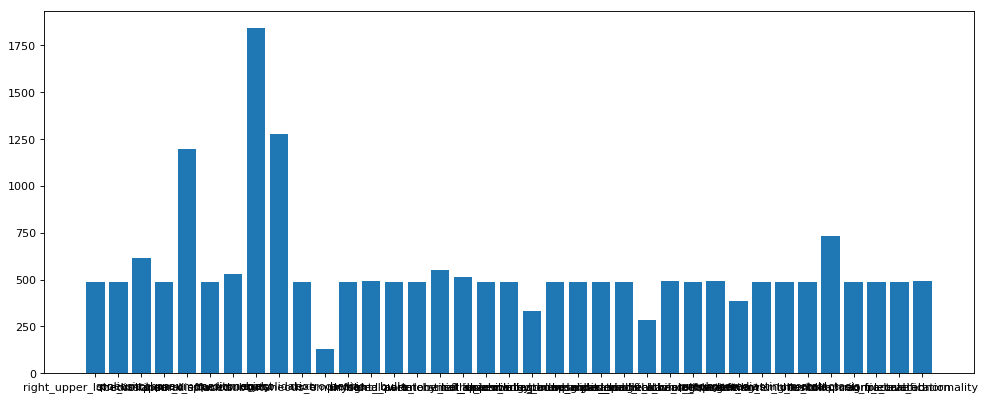

In [42]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(range(len(dLabelsSelected)), dLabelsSelected.values(), align='center')
plt.xticks(range(len(dLabelsSelected)), dLabelsSelected.keys())
plt.show()

In [95]:
import pandas as pd
dfReports = pd.DataFrame(columns=["_id","Report","labels"])
for i in selIds: # I want the same order as in selIds
    report = collection.find_one({"_id": {"$eq": i}},{"_id": 1, "Rep Text with Spacing":1, "Annotations.Report.labels":1})
#     aux = report["Annotations"]["Report"]["labels"]
#     print aux.encode("utf-8")
#     break
    # dfReports = dfReports.append(pd.Series([report["_id"], report["Rep Text with Spacing"].values()[0].encode("utf-8"), report["Annotations"]["Report"]["labels"]],index=dfReports.columns), ignore_index=True)
    dfReports = dfReports.append(pd.Series([report["_id"], report["Rep Text with Spacing"].values()[0], report["Annotations"]["Report"]["labels"]],index=dfReports.columns), ignore_index=True)

In [96]:
dfReports.head()
fnFirs10Kreps = '/home/ydc19/Documents/Code/selReports.csv'
dfReports.to_csv(fnFirs10Kreps, index=False, columns=dfReports.columns, sep='$', encoding='utf-8')

## Repair "report text" from the ones extracted

In [139]:
from utils import corpus
fnFirs10Kreps = '/home/ydc19/Documents/Code/ReportsForAnnotateX/selReports.csv'
dfOldReports = pd.read_csv(fnFirs10Kreps, sep='$', encoding='utf-8')
dfOldReports.head()

_id                                             Report  \
0  RJ107502850  Compared with the previous image on 15/7/10, t...   
1  RJ107502248  There is a scoliosis of the thoracic spine con...   
2  RJ107500844  The heart is enlarged.   There are bilateral p...   
3  RJ107501668  Surgical emphysema noted overlying the right c...   
4  RJ107501916  Comparison was made with the chest radiograph ...   

                                              labels  
0  [right_upper_lobe_collapse, consolidation, par...  
1    [atelectasis, mediastinum_displaced, scoliosis]  
2    [cardiomegaly, consolidation, pleural_effusion]  
3  [subcutaneous_emphysema, object, pleural_effus...  
4  [dextrocardia, subcutaneous_emphysema, object,...

In [151]:
dfOldReports['NewReport'] = dfOldReports._id.apply(lambda x : corpus.getReportRawTextById(x, collection))

In [152]:
dfOldReports.head()

_id                                             Report  \
0  RJ107502850  Compared with the previous image on 15/7/10, t...   
1  RJ107502248  There is a scoliosis of the thoracic spine con...   
2  RJ107500844  The heart is enlarged.   There are bilateral p...   
3  RJ107501668  Surgical emphysema noted overlying the right c...   
4  RJ107501916  Comparison was made with the chest radiograph ...   

                                              labels  \
0  [right_upper_lobe_collapse, consolidation, par...   
1    [atelectasis, mediastinum_displaced, scoliosis]   
2    [cardiomegaly, consolidation, pleural_effusion]   
3  [subcutaneous_emphysema, object, pleural_effus...   
4  [dextrocardia, subcutaneous_emphysema, object,...   

                                           NewReport  
0  Compared with the previous image on 15/7/10, t...  
1  There is a scoliosis of the thoracic spine con...  
2  The heart is enlarged.   There are bilateral p...  
3  Surgical emphysema noted overlying the right c...  
4  Comparison was made with the chest radiograph ...

In [163]:
dfReportsToCorrect = dfOldReports[(dfOldReports.Report != dfOldReports.NewReport)]
fnReportsToCorrect = '/home/ydc19/Documents/Code/ReportsForAnnotateX/selReports_subsetToCorrect.csv'
dfReportsToCorrect.to_csv(fnReportsToCorrect, index=False, columns=["_id", "NewReport", "labels"], sep='$', encoding='utf-8')

In [164]:
fnReportsCorrect = '/home/ydc19/Documents/Code/ReportsForAnnotateX/selReports_correct.csv'
dfOldReports.to_csv(fnReportsCorrect, index=False, columns=["_id", "NewReport", "labels"], sep='$', encoding='utf-8')

In [156]:
dfOldReports.columns

Index([u'_id', u'Report', u'labels', u'NewReport'], dtype='object')

# Reports from GOLDEN_SET

In [1]:
pklFile = '/home/ydc19/Documents/NLP/data/NLP_annotations_170125_FinalSamAndRob.pkl'

In [3]:
import sys
sys.path.append('/home/ydc19/Documents/NLP/medtopics')

from utils import corpus
import pickle

with open(pklFile, 'rb') as f:
    annotations = pickle.load(f)

INFO:CoreNLP_PyWrapper:Starting java subprocess, and waiting for signal it's ready, with command: exec java -Xmx4g -XX:ParallelGCThreads=1 -cp '/home/ydc19/anaconda2/envs/py27_NLP/lib/python2.7/site-packages/stanford_corenlp_pywrapper/lib/*:/home/ydc19/Documents/NLP/stanford-corenlp-full-2015-12-09/*:/home/ydc19/Documents/NLP/stanford-corenlp-full-2015-12-09/stanford-english-corenlp-2016-01-10-models.jar'      corenlp.SocketServer --outpipe /tmp/corenlp_pywrap_pipe_pypid=28209_time=1565793562.84  --configdict '{"output_types": ["pos", "parse"], "parse.model": "edu/stanford/nlp/models/parser/nndep/english_UD.gz", "annotators": "tokenize, ssplit, pos, depparse"}'
INFO:CoreNLP_PyWrapper:Successful ping. The server has started.
INFO:CoreNLP_PyWrapper:Subprocess is ready.


In [5]:
# First run the mongoDB service on a terminal
# sudo mongod
from pymongo import MongoClient
client = MongoClient()

db_exams = client.kcl_test
collection = db_exams.kcl

In [6]:
cnt=0
for i in annotations.iteritems():
    cnt += 1
    print i
    if cnt > 5:
        break

('RJ108393414', {u'57d6e3816b3d152d4bfa69fd': {u'right_lower_lobe_collapse': [True, u''], u'object': [True, u''], u'consolidation': [True, u''], u'left_lower_lobe_collapse': [True, u'']}, u'57d7021f6b3d15304923b896': {u'right_lower_lobe_collapse': [True, u''], u'object': [True, u''], u'consolidation': [True, u''], u'left_lower_lobe_collapse': [True, u'']}})
('RJ110080900', {u'57d6e3816b3d152d4bfa69fd': {u'normal': [True, u'']}, u'57d7021f6b3d15304923b896': {u'normal': [True, u'']}})
('RJ108482651', {u'57d6e3816b3d152d4bfa69fd': {u'right_upper_lobe_collapse': [True, u''], u'mediastinum_displaced': [True, u''], u'right_middle_lobe_collapse': [True, u''], u'object': [True, u''], u'consolidation': [True, u''], u'right_lower_lobe_collapse': [True, u'']}, u'57d7021f6b3d15304923b896': {u'right_upper_lobe_collapse': [True, u''], u'mediastinum_displaced': [True, u''], u'right_middle_lobe_collapse': [True, u''], u'object': [True, u''], u'consolidation': [True, u''], u'right_lower_lobe_collapse':

In [7]:
len(annotations.keys())

7576

In [8]:
import pickle as pickle

def getAccConsensus(ann_file_path): 
    import re    
    accs_cons = []
    id2lbs = {}
    usr_ids = ['57d6e3816b3d152d4bfa69fd','57d7021f6b3d15304923b896']
    annotations = pickle.load(open( ann_file_path,"rb"))    

    i=1
    err_acc_num_list = {}
    for k in annotations.keys():
        ann_labels = []
        ann_labels_count = {}
        num_annotations_for_element_k = 0
        
        for usr in annotations[k].keys():
            for usr_id in usr_ids:
                if usr == usr_id: #'57d6e3816b3d152d4bfa69fd','57d7021f6b3d15304923b896' sam,rob
                    num_annotations_for_element_k = num_annotations_for_element_k + 1
                    for cl in annotations[k][usr].keys():
                        if annotations[k][usr][cl][0] == True:
    
                            final_class = cl
                            if cl == "lung_mass" or cl == "lung_nodule":
                                final_class = "parenchymal_lesion" 
                            if cl == "tension_pneumothorax":
                                final_class = "pneumothorax"
                            if cl == "airspace_shadowing":
                                final_class = "consolidation" 
                            if cl == "widened_paratracheal_stripe" or cl == "enlarged_hilum":  
                                final_class = "paratracheal_hilar_enlargement"   
                            if cl == "pleural_thickening" or cl == "pleural_lesion":   
                                final_class = "pleural_abnormality"                                 
                            if final_class not in ann_labels_count.keys():
                                ann_labels_count[final_class] = 0
                            ann_labels_count[final_class] = ann_labels_count[final_class] + 1
                        
        if len(ann_labels_count.keys()) > 0: 
            for el in ann_labels_count.keys():
                if ann_labels_count[el] < num_annotations_for_element_k:#len(annotations[k].keys()):
                   if not k in err_acc_num_list.keys():
                       err_acc_num_list[k] = 1  
                   else:
                       err_acc_num_list[k] = err_acc_num_list[k] + 1
                else:
                    ann_labels.append(el)
        
            
            if not k in err_acc_num_list.keys():
                accs_cons.append(k)
                id2lbs[k] = ann_labels
    return accs_cons,id2lbs

nlp_acc_cons,id2lb_true = getAccConsensus('/home/ydc19/Documents/NLP/data/NLP_annotations_170125_FinalSamAndRob.pkl')
print len(nlp_acc_cons)
print len(id2lb_true)

4551
4551


In [9]:
len(id2lb_true)

4551

In [55]:
countsUsrs = dict()
for k in annotations.keys():
    for usr in annotations[k].keys():
        if usr in countsUsrs.keys():
            countsUsrs[usr] += 1
        else:
            print k + ': ' + str(annotations[k])
            countsUsrs[usr] = 1

RJ108393414: {u'57d6e3816b3d152d4bfa69fd': {u'right_lower_lobe_collapse': [True, u''], u'object': [True, u''], u'consolidation': [True, u''], u'left_lower_lobe_collapse': [True, u'']}, u'57d7021f6b3d15304923b896': {u'right_lower_lobe_collapse': [True, u''], u'object': [True, u''], u'consolidation': [True, u''], u'left_lower_lobe_collapse': [True, u'']}}
RJ108393414: {u'57d6e3816b3d152d4bfa69fd': {u'right_lower_lobe_collapse': [True, u''], u'object': [True, u''], u'consolidation': [True, u''], u'left_lower_lobe_collapse': [True, u'']}, u'57d7021f6b3d15304923b896': {u'right_lower_lobe_collapse': [True, u''], u'object': [True, u''], u'consolidation': [True, u''], u'left_lower_lobe_collapse': [True, u'']}}
RJ108810295: {u'585188736b3d15243a69e1c5': {u'parenchymal_lesion': [True, u'']}}


In [57]:
countsUsrs

{u'57d6e3816b3d152d4bfa69fd': 5584,
 u'57d7021f6b3d15304923b896': 5585,
 u'585188736b3d15243a69e1c5': 2000}

In [ ]:
# def translateLabel(cl):
#     final_class = cl
#     if cl == "lung_mass" or cl == "lung_nodule":
#         final_class = "parenchymal_lesion" 
#     if cl == "tension_pneumothorax":
#         final_class = "pneumothorax"
#     if cl == "airspace_shadowing":
#         final_class = "consolidation" 
#     if cl == "widened_paratracheal_stripe" or cl == "enlarged_hilum":  
#         final_class = "paratracheal_hilar_enlargement"   
#     if cl == "pleural_thickening" or cl == "pleural_lesion":   
#         final_class = "pleural_abnormality"
#     return final_class

# def formatListLabels(listLabels):
#     return '[' + listLabels[1:] + ']'


# # Create dataframe with annotations:
# import pandas as pd
# usr_ids = ['57d6e3816b3d152d4bfa69fd','57d7021f6b3d15304923b896']
# dfAnnotations = pd.DataFrame(columns=["_id","Report","labels_usr1", "labels_usr2"])

# for r in annotations.keys():
#     report_text = corpus.getReportRawTextById(r, collection)
#     labels = []
#     if set(usr_ids).intersection(annotations[r].keys()):
#         for u in usr_ids:
#             labels.append('')
#             if u in annotations[r].keys():
#                 for cl in annotations[r][u].keys():
#                     if annotations[r][u][cl][0] == True:
#                         labels[-1] = labels[-1] + ',' + translateLabel(cl).encode("utf-8")
#                     else:
#                         print "WARNING: {}".format(r)
#             else:
#                 labels[-1] = ','
#             #print 'labels: {}'.format('[' + labels[-1][1:] + ']')
#         dfAnnotations = dfAnnotations.append(pd.Series([r, report_text, formatListLabels(labels[0]), formatListLabels(labels[1])], index=dfAnnotations.columns), ignore_index=True)
                                                    

In [10]:
# Create dataframe with annotations:
import pandas as pd
usr_ids = ['57d6e3816b3d152d4bfa69fd','57d7021f6b3d15304923b896']
dfGoldenSet = pd.DataFrame(columns=["_id","Report","golden_labels"])

for r in id2lb_true.keys():
    report_text = corpus.getReportRawTextById(r, collection)
    dfGoldenSet = dfGoldenSet.append(pd.Series([r, report_text, id2lb_true[r]], index=dfGoldenSet.columns), ignore_index=True)
                                                    

In [181]:
dfGoldenSet.head()

_id                                             Report  \
0  RJ108393414  Comparison is made with the examination taken ...   
1  RJ110080900  Cardiomediastinal contour is normal.  The lung...   
2  RJ108482651  There is a left bronchial stent in-situ extend...   
3  RJ108810295  AN ADDENDUM HAS BEEN ENTERED AT THE END OF THI...   
4   X-06292161              bilateral ground glass consolidation.   

                                       golden_labels  
0  [left_lower_lobe_collapse, object, consolidati...  
1                                           [normal]  
2  [right_upper_lobe_collapse, mediastinum_displa...  
3                               [parenchymal_lesion]  
4        [ground_glass_opacification, consolidation]

In [11]:
len(dfGoldenSet)

4551

In [14]:
dfGoldenSet.to_csv('/home/ydc19/Documents/Code/ReportsForAnnotateX/golden_set.csv', index=False, columns=dfGoldenSet.columns, sep='$', encoding='utf-8', quoting=True, quotechar='"')

In [130]:

doc = collection.find_one({"_id": {"$eq": 'X-06292161'}},{"_id": 1, "Rep Text with Spacing":1})

In [132]:
doc["Rep Text with Spacing"].values()

[u'? pneumonia',
 u'Previous consolidation, unable to wean ventilation',
 u'bilateral ground glass consolidation.']